## Creditworthiness

Business Problem : Determining if new customers are creditworthy to give a loan to

Dataset:

1.Data on all past applications, includes all credit approvals from your past loan applicants the bank has ever completed 

2.The list of new customers that need to be processed

In [537]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [538]:
df_train = pd.read_excel('credit-data-training.xlsx')

In [539]:
df_train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [540]:
df_train.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

The field Duration in Current Address has 344 nulls. 344 is a relatively large set,so I decide drop this field. For Age-years, there is only 12 nulls. 12 is a small set, so I fill nulls with median

In [541]:
df_train.drop(columns = 'Duration-in-Current-address',inplace = True)

In [542]:
df_train['Age-years']

0       NaN
1      29.0
2      42.0
3      37.0
4      27.0
       ... 
495     NaN
496    27.0
497    27.0
498    63.0
499    27.0
Name: Age-years, Length: 500, dtype: float64

In [543]:
df_train = df_train.replace(np.nan,df_train['Age-years'].median())

In [544]:
df_train['Age-years']

0      33.0
1      29.0
2      42.0
3      37.0
4      27.0
       ... 
495    33.0
496    27.0
497    27.0
498    63.0
499    27.0
Name: Age-years, Length: 500, dtype: float64

In [545]:
df_train.isnull().sum()

Credit-Application-Result            0
Account-Balance                      0
Duration-of-Credit-Month             0
Payment-Status-of-Previous-Credit    0
Purpose                              0
Credit-Amount                        0
Value-Savings-Stocks                 0
Length-of-current-employment         0
Instalment-per-cent                  0
Guarantors                           0
Most-valuable-available-asset        0
Age-years                            0
Concurrent-Credits                   0
Type-of-apartment                    0
No-of-Credits-at-this-Bank           0
Occupation                           0
No-of-dependents                     0
Telephone                            0
Foreign-Worker                       0
dtype: int64

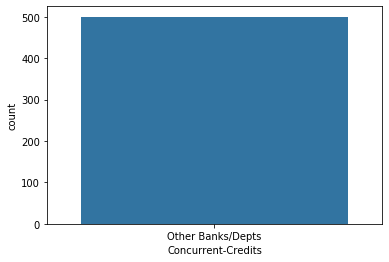

In [546]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_train, x= 'Concurrent-Credits',color = base_color)

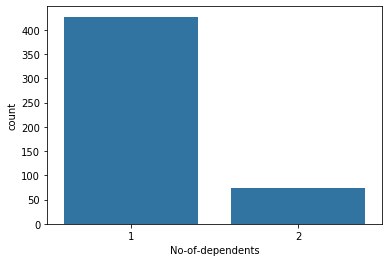

In [547]:
sb.countplot(data = df_train, x= 'No-of-dependents',color = base_color)



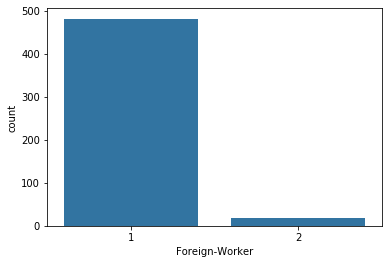

In [548]:
sb.countplot(data = df_train, x= 'Foreign-Worker',color = base_color)


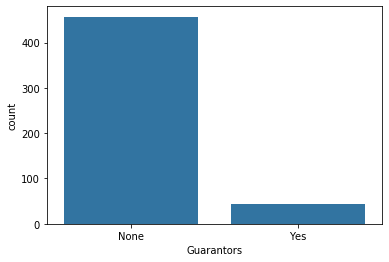

In [549]:
sb.countplot(data = df_train, x= 'Guarantors',color = base_color)


In [550]:
df_train = df_train.drop(['Guarantors','Foreign-Worker','No-of-dependents','Concurrent-Credits','Telephone'],axis = 1)


In [551]:
df_train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1,1


I found some low-Variability variables: Concurrent Credit, Guarantors, Foreign Worker, No of dependents.
I also exclude Telephone, because it is unrelated to our analysis.

In [552]:
df_train['Credit-Application-Result'].value_counts()

Creditworthy        358
Non-Creditworthy    142
Name: Credit-Application-Result, dtype: int64

In [553]:
for index, row in df_train.iterrows():
    if row['Credit-Application-Result'] == "Creditworthy":
        value = 1
    else:
        value = 0
  
        
    df_train.at[index,'Credit-Application-Result'] = value
    

df_train.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation
0,1,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,1,33.0,2,1,1
1,1,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,1,29.0,2,1,1
2,1,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,1,42.0,2,More than 1,1
3,1,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,1,37.0,2,1,1
4,1,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,1,27.0,2,1,1


In [554]:
df_train['Credit-Application-Result'].value_counts()

1    358
0    142
Name: Credit-Application-Result, dtype: int64

In [555]:
df_train['Credit-Application-Result'] = df_train['Credit-Application-Result'].astype('int')

In [556]:
df_train['Credit-Application-Result'].dtype


dtype('int64')

In [557]:
df_test = pd.read_excel('customers-to-score.xlsx')

In [558]:
# Get list of categorical variables
object_cols = [col for col in df_train.columns if df_train[col].dtype == "object"]


In [559]:
low_cardinality_cols = [col for col in object_cols if df_train[col].nunique() < 10]
print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)

Categorical columns that will be one-hot encoded: ['Account-Balance', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Value-Savings-Stocks', 'Length-of-current-employment', 'No-of-Credits-at-this-Bank']


In [560]:
df_train['label'] = 'train'
df_test['label'] = 'test'
# Concat
concat_df = pd.concat([df_train, df_test])
concat_df.drop(['Guarantors','Foreign-Worker','No-of-dependents','Concurrent-Credits','Telephone','Duration-in-Current-address'],axis = 1,inplace = True)
concat_df.isnull().any()

Credit-Application-Result             True
Account-Balance                      False
Duration-of-Credit-Month             False
Payment-Status-of-Previous-Credit    False
Purpose                              False
Credit-Amount                        False
Value-Savings-Stocks                 False
Length-of-current-employment         False
Instalment-per-cent                  False
Most-valuable-available-asset        False
Age-years                            False
Type-of-apartment                    False
No-of-Credits-at-this-Bank           False
Occupation                           False
label                                False
dtype: bool

In [561]:
# Create your dummies
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(concat_df[low_cardinality_cols])) # Your code here

# One-hot encoding removed index; put it back
OH_cols_test.index = concat_df.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_test = concat_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [562]:
OH_X_test.head()

,Credit-Application-Result,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,label,0,...,7,8,9,10,11,12,13,14,15,16
0,1.0,4,1494,1,1,33.0,2,1,train,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.0,4,1494,1,1,29.0,2,1,train,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,4,1544,2,1,42.0,2,1,train,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,4,3380,1,1,37.0,2,1,train,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,6,343,4,1,27.0,2,1,train,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [563]:
OH_X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Credit-Application-Result      500 non-null    float64
 1   Duration-of-Credit-Month       1000 non-null   int64  
 2   Credit-Amount                  1000 non-null   int64  
 3   Instalment-per-cent            1000 non-null   int64  
 4   Most-valuable-available-asset  1000 non-null   int64  
 5   Age-years                      1000 non-null   float64
 6   Type-of-apartment              1000 non-null   int64  
 7   Occupation                     1000 non-null   int64  
 8   label                          1000 non-null   object 
 9   0                              1000 non-null   float64
 10  1                              1000 non-null   float64
 11  2                              1000 non-null   float64
 12  3                              1000 non-null   fl

In [564]:
# Split your data
df_train = OH_X_test[OH_X_test['label'] == 'train']
df_test = OH_X_test[OH_X_test['label'] == 'test']

# Drop your labels
df_train = df_train.drop('label', axis=1)
df_test = df_test.drop('label', axis=1)

In [565]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Credit-Application-Result      500 non-null    float64
 1   Duration-of-Credit-Month       500 non-null    int64  
 2   Credit-Amount                  500 non-null    int64  
 3   Instalment-per-cent            500 non-null    int64  
 4   Most-valuable-available-asset  500 non-null    int64  
 5   Age-years                      500 non-null    float64
 6   Type-of-apartment              500 non-null    int64  
 7   Occupation                     500 non-null    int64  
 8   0                              500 non-null    float64
 9   1                              500 non-null    float64
 10  2                              500 non-null    float64
 11  3                              500 non-null    float64
 12  4                              500 non-null    flo

In [566]:
y = df_train['Credit-Application-Result']
# Create X
# features = ['Account-Balance', 'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit', 'Purpose', 'Credit-Amount', 'Value-Savings-Stocks', 'Length-of-current-employment','Instalment-per-cent','Most-valuable-available-asset','Age-years','Type-of-apartment','No-of-Credits-at-this-Bank','Occupation']
features = []
for col in df_train.columns:
    if ('Credit-Application-Result' not in str(col)):
        features.append(col)
        
X = df_train[features]

# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

### Random Forest Model

In [567]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,min_samples_leaf=5,min_samples_split = 5,criterion='entropy',bootstrap = True,random_state =2)
model.fit(train_X, train_y)
rf_predictions = model.predict(val_X)

In [568]:
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(val_y, rf_predictions)
roc_value

0.6897058823529412

In [569]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(val_y, rf_predictions)
confusion_matrix

array([[18, 22],
       [ 6, 79]])

In [570]:
from sklearn.metrics import accuracy_score
accuracy_score(val_y, rf_predictions)

0.776

In [571]:
#precision
from sklearn.metrics import precision_score
precision_score(val_y, rf_predictions)

0.7821782178217822

In [572]:
#recall score
from sklearn.metrics import recall_score
recall_score(val_y, rf_predictions)

0.9294117647058824

In [573]:
from sklearn.metrics import f1_score
f1_score(val_y, rf_predictions)

0.8494623655913979

### Boosted Model

In [574]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [575]:
gb_clf2 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, max_features=2, max_depth=2, random_state=2)
gb_clf2.fit(train_X, train_y)
predictions_GB = gb_clf2.predict(val_X)


In [576]:
print(confusion_matrix(val_y, predictions_GB))

[[20 20]
 [15 70]]


In [577]:
print(classification_report(val_y, predictions_GB))

              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53        40
         1.0       0.78      0.82      0.80        85

    accuracy                           0.72       125
   macro avg       0.67      0.66      0.67       125
weighted avg       0.71      0.72      0.71       125



In [578]:
from sklearn.metrics import accuracy_score
accuracy_score(val_y, predictions_GB)

0.72

In [579]:
#recall score
from sklearn.metrics import recall_score
recall_score(val_y, predictions_GB)

0.8235294117647058

### Model Comparsion
Compare boosted model to Random Forest, Random Forest has higher accuarcy, especially for predicting creditworthy part. Because the boss only cares about how accurate you can identify people who qualify, so FM model qualifies.

### Prediction

In [580]:
df_test.drop(['Credit-Application-Result'],axis = 1,inplace = True)

In [581]:
preds_n = model.predict(df_test)

In [582]:
df_test['credit'] = pd.Series(preds_n)

In [583]:
df_test.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],axis = 1,inplace = True)

In [584]:
df_test

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,credit
0,9,2799,2,1,36.0,1,1,1.0
1,12,2122,3,1,39.0,1,1,1.0
2,24,3758,1,4,23.0,1,1,1.0
3,11,3905,2,1,36.0,1,1,1.0
4,6,1957,1,3,31.0,2,1,1.0
...,...,...,...,...,...,...,...,...
495,18,3966,1,1,33.0,1,1,1.0
496,12,6199,4,2,28.0,1,1,0.0
497,24,1987,2,1,21.0,1,1,1.0
498,24,2303,4,1,45.0,2,1,1.0


In [585]:
for index, row in df_test.iterrows():
    if row['credit'] > 0.5:
        value = 'Creditworthy'
    else:
        value = 'Non-Creditworthy'
  
        
    df_test.at[index,'Credit-Application-Result'] = value
    

df_test.sample(10)

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,credit,Credit-Application-Result
296,12,836,4,2,23.0,2,1,1.0,Creditworthy
159,6,1343,1,1,46.0,2,1,1.0,Creditworthy
161,18,6070,3,3,33.0,2,1,1.0,Creditworthy
214,39,14179,4,2,30.0,2,1,1.0,Creditworthy
477,21,2767,4,3,61.0,1,1,1.0,Creditworthy
412,6,1209,4,2,47.0,2,1,1.0,Creditworthy
496,12,6199,4,2,28.0,1,1,0.0,Non-Creditworthy
400,24,1207,4,2,24.0,1,1,0.0,Non-Creditworthy
425,12,727,4,4,33.0,2,1,1.0,Creditworthy
313,24,2957,4,2,63.0,2,1,1.0,Creditworthy


In [586]:
df_test['Credit-Application-Result'].value_counts()

Creditworthy        449
Non-Creditworthy     51
Name: Credit-Application-Result, dtype: int64

There are 449 applicants are qualifies for creditworthy